In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix

In [ ]:
train_df = pd.read_csv(filepath_or_buffer="/content/train.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_df = pd.read_csv(filepath_or_buffer="/content/test.csv")
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train_df .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Missing values are present in Age, Cabin, Embarked columns

In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_df.skew(numeric_only=True)

,0
PassengerId,0.000000
Survived,0.478523
Pclass,-0.630548
Age,0.389108
SibSp,3.695352
Parch,2.749117
Fare,4.787317


In [ ]:
pip install ydata-profiling

In [ ]:
from ydata_profiling import ProfileReport
profile = ProfileReport(train_df, title="My_Data_Report", explorative=True)
profile.to_file("pre_processing.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 12/12 [00:00<00:00, 60.19it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#from google.colab import files
#files.download('pre_processing.html')

In [ ]:
missing_frame = pd.DataFrame(index = train_df.columns.values)
missing_frame['Null Frequency'] = train_df.isnull().sum().values
nullpercent = train_df.isnull().sum().values/train_df.shape[0]
missing_frame['Missing Null %age'] = np.round(nullpercent, decimals = 4) * 100
missing_frame['Zero Frequency'] = train_df[train_df == 0].count().values
zero_percent = train_df[train_df == 0].count().values / train_df.shape[0]
missing_frame['Missing %age'] = np.round(zero_percent, decimals = 4) * 100
missing_frame.transpose()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Null Frequency,0.0,0.00,0.0,0.0,0.0,177.00,0.00,0.00,0.0,0.00,687.0,2.00
Missing Null %age,0.0,0.00,0.0,0.0,0.0,19.87,0.00,0.00,0.0,0.00,77.1,0.22
Zero Frequency,0.0,549.00,0.0,0.0,0.0,0.00,608.00,678.00,0.0,15.00,0.0,0.00
Missing %age,0.0,61.62,0.0,0.0,0.0,0.00,68.24,76.09,0.0,1.68,0.0,0.00


In [ ]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [ ]:
train_df.isnull().sum().values

array([  0,   0,   0,   0,   0, 177,   0,   0,   0,   0, 687,   2])

In [ ]:
train_df.isnull().sum().values/train_df.shape[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.1986532 , 0.        , 0.        , 0.        , 0.        ,
       0.77104377, 0.00224467])

In [ ]:
missing_frame['Missing Null %age'] = np.round(nullpercent, decimals = 4) * 100

In [ ]:
missing_frame['Missing Null %age']

,Missing Null %age
PassengerId,0.00
Survived,0.00
Pclass,0.00
Name,0.00
Sex,0.00
Age,19.87
SibSp,0.00
Parch,0.00
Ticket,0.00
Fare,0.00


In [ ]:
missing_frame['Zero Frequency'] = train_df[train_df == 0].count().values
zero_percent = train_df[train_df == 0].count().values / train_df.shape[0]

In [ ]:
missing_frame['Zero Frequency']

,Zero Frequency
PassengerId,0
Survived,549
Pclass,0
Name,0
Sex,0
Age,0
SibSp,608
Parch,678
Ticket,0
Fare,15


In [ ]:
missing_frame['Missing %age'] = np.round(zero_percent, decimals = 4) * 100

In [ ]:
missing_frame['Missing %age']

,Missing %age
PassengerId,0.00
Survived,61.62
Pclass,0.00
Name,0.00
Sex,0.00
Age,0.00
SibSp,68.24
Parch,76.09
Ticket,0.00
Fare,1.68


In [ ]:
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

/tmp/ipython-input-20-2806199795.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
/tmp/ipython-input-20-2806199795.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [ ]:
train_df['Embarked'].mode()

,Embarked
0,S


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_df.drop(columns=['Cabin','PassengerId'],axis=1,inplace=True)

In [ ]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [ ]:
train_df['FamilySize'] = train_df['SibSp']+train_df['Parch']+1

In [ ]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S,4
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1


# Exploratory Data Analysis

In [ ]:
train_df['Survived'].value_counts()

,count
Survived,
0,549
1,342


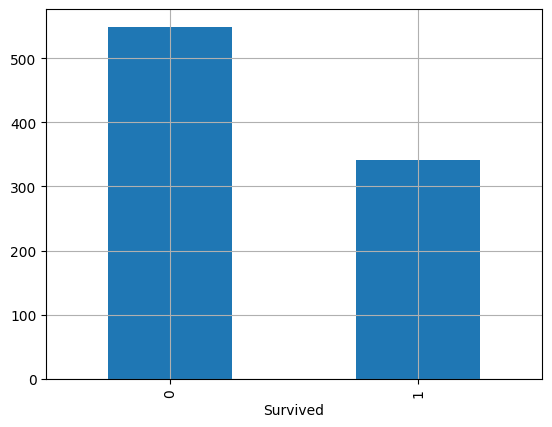

In [ ]:
train_df['Survived'].value_counts().plot(kind='bar')
plt.grid(visible=True)
plt.show()

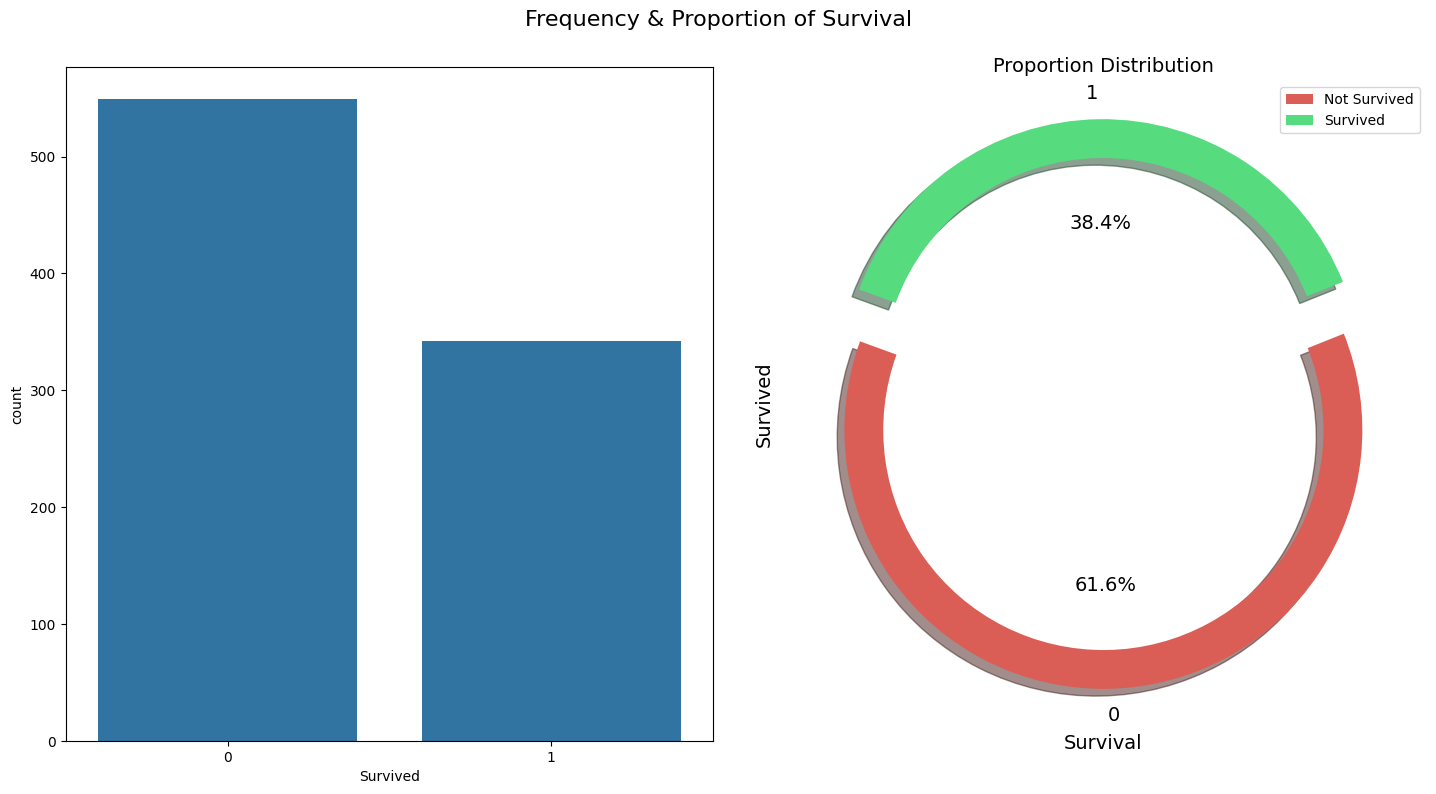

In [ ]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=[9,5])
sns.countplot(x='Survived',data=train_df,ax=ax[0])
plt.xlabel(xlabel = 'Survival', size = 14)
plt.ylabel(ylabel = 'Frequency', size = 14)
plt.title(label = 'Frequency Distribution', size = 14)

space = np.ones(2)/10
train_df['Survived'].value_counts().plot(kind = 'pie', explode = space, fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width=0.15),
                                       shadow = True, startangle = 160, figsize = [15, 8], legend = True, colors = ['#DB5E56','#56DB7F'],ax=ax[1])
plt.legend(['Not Survived', 'Survived'])
plt.ylabel(ylabel = 'Survived', size = 14)
plt.title(label = 'Proportion Distribution', size = 14)
plt.tight_layout(pad = 3.0)
plt.suptitle(t = 'Frequency & Proportion of Survival', y = 1.02, size = 16)

plt.show()

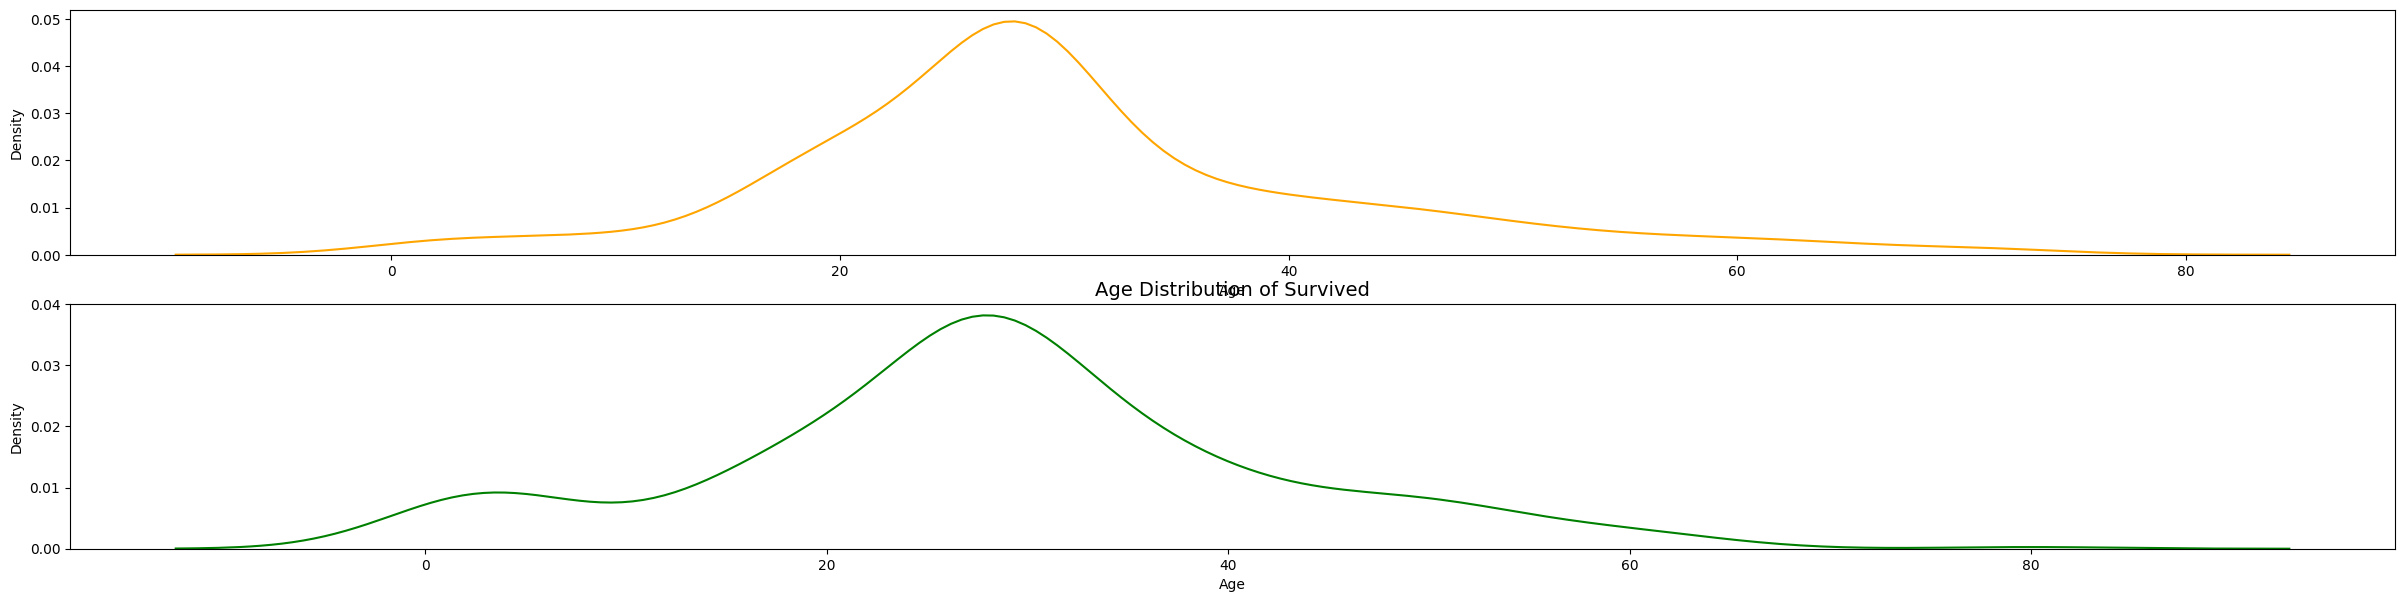

In [ ]:
not_survived = train_df['Age'][train_df['Survived'] == 0]
survived = train_df['Age'][train_df['Survived'] == 1]

fig,(ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize=[30,7])
ax1 = sns.kdeplot(not_survived,color='orange',ax=ax1)
plt.title(label = 'Age Distribution of Not Survived', size = 14)
ax2 = sns.kdeplot(survived,color='green',ax=ax2)
plt.title(label = 'Age Distribution of Survived', size = 14)
plt.show()

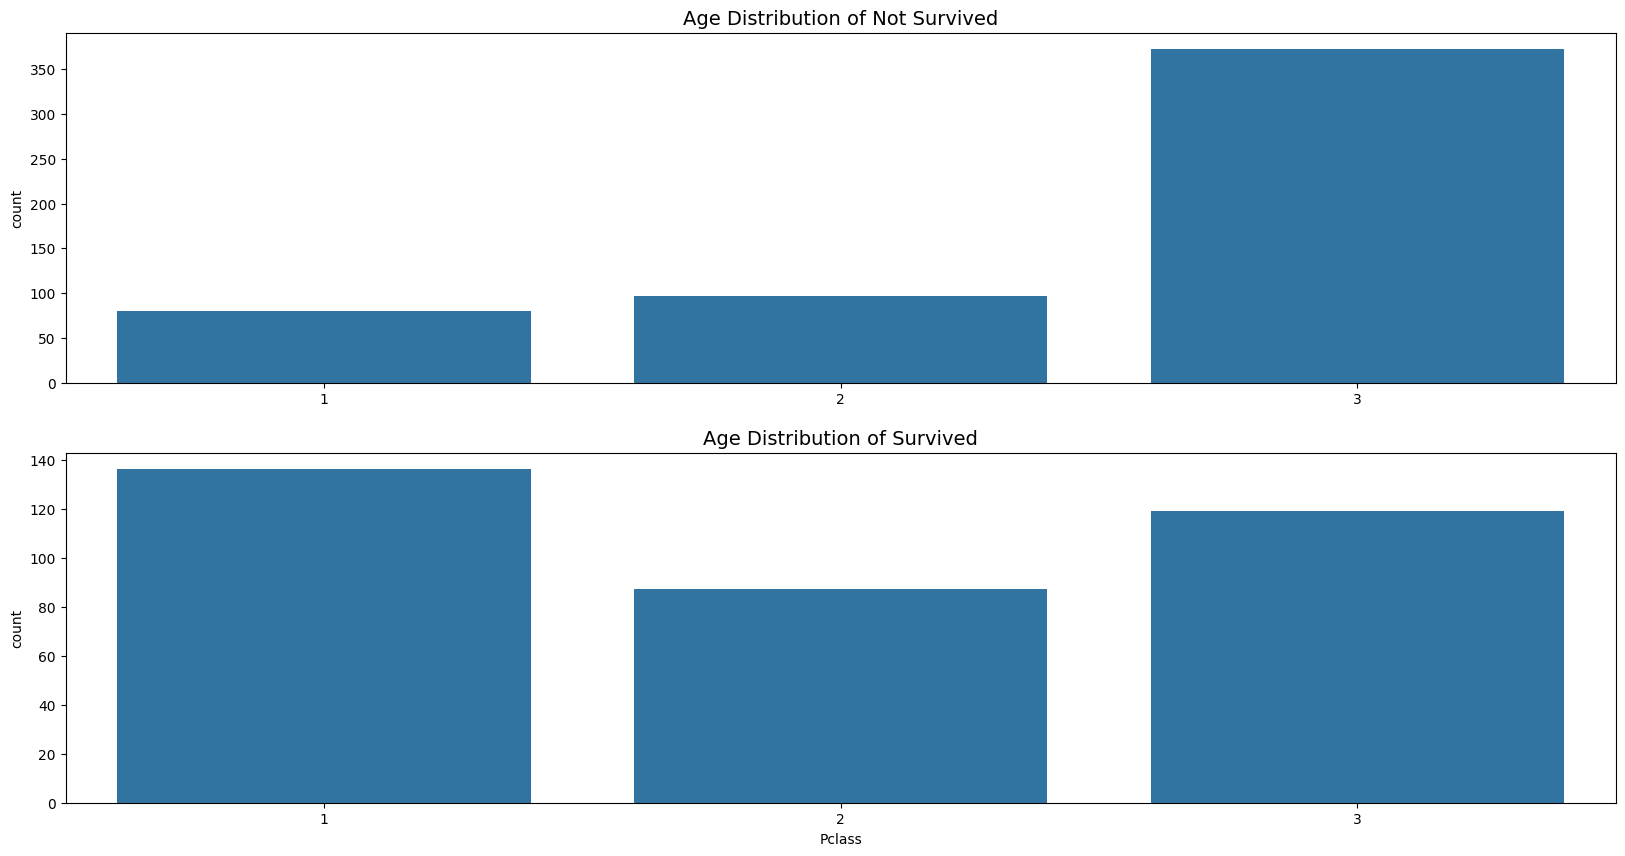

In [ ]:
not_survived = train_df['Pclass'][train_df['Survived'] == 0]
survived = train_df['Pclass'][train_df['Survived'] == 1]

fig,(ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize=(20,10))
sns.countplot(x=not_survived,ax=ax1)
ax1.set_title(label = 'Age Distribution of Not Survived', size = 14)
ax1.set_xlabel(xlabel = '')
sns.countplot(x=survived,ax=ax2)
ax2.set_title(label = 'Age Distribution of Survived', size = 14)
plt.show()

In [ ]:
train_df['Pclass'][train_df['Survived'] == 0]

,Pclass
0,3
4,3
5,3
6,1
7,3
...,...
884,3
885,3
886,2
888,3


In [ ]:
train_df['Pclass'][train_df['Survived'] == 1]

,Pclass
1,1
2,3
3,1
8,3
9,2
...,...
875,3
879,1
880,2
887,1


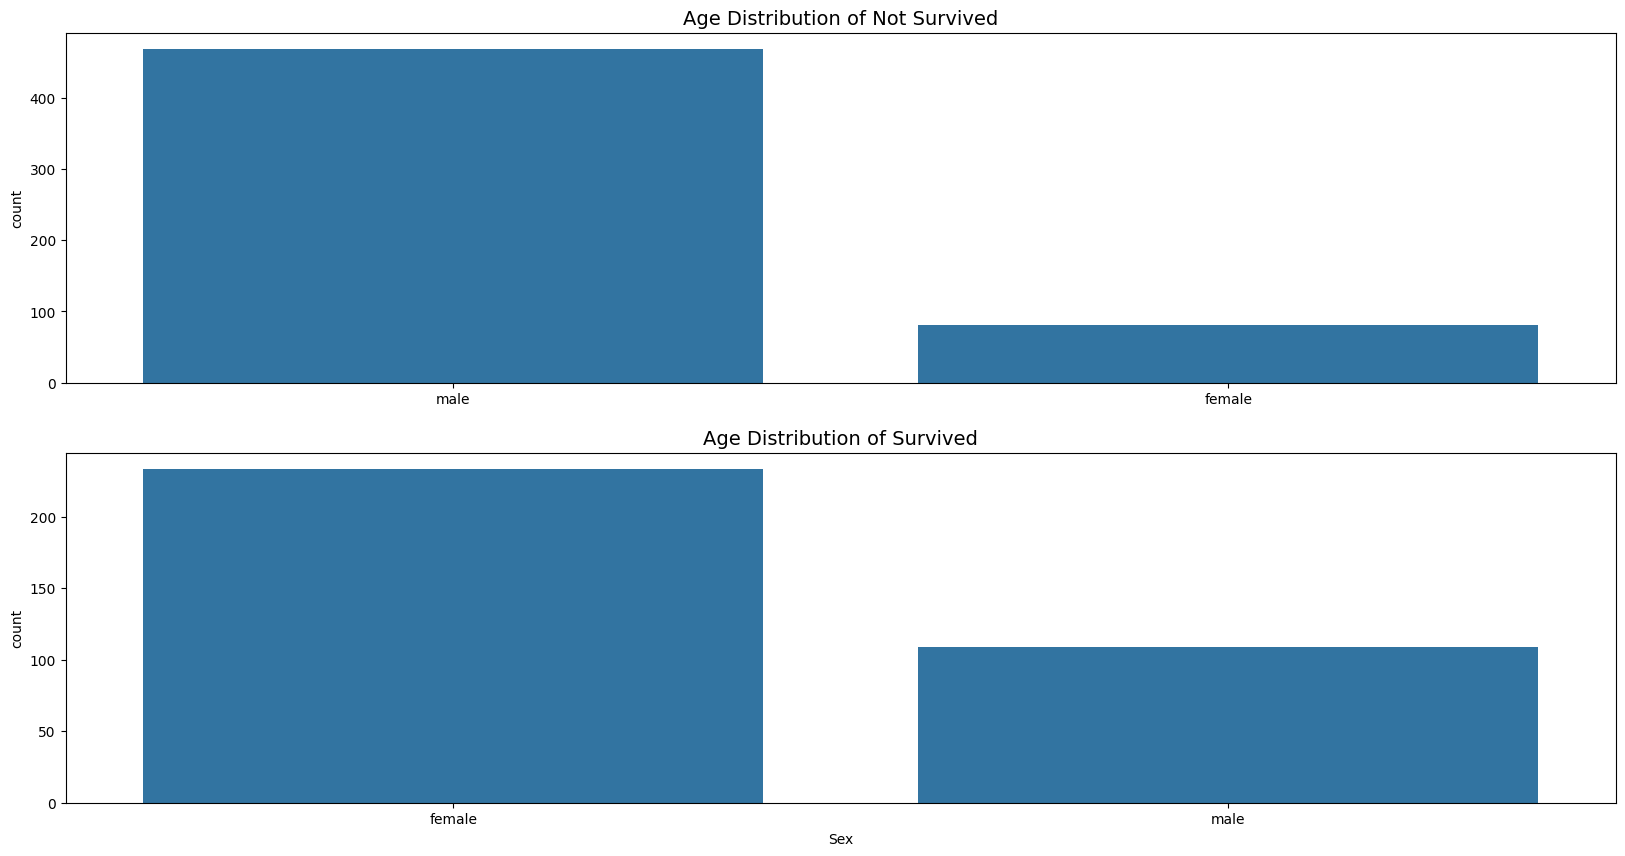

In [ ]:
not_survived = train_df['Sex'][train_df['Survived'] == 0]
survived = train_df['Sex'][train_df['Survived'] == 1]

fig,(ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize=(20,10))
sns.countplot(x=not_survived,ax=ax1)
ax1.set_title(label = 'Age Distribution of Not Survived', size = 14)
ax1.set_xlabel(xlabel = '')
sns.countplot(x=survived,ax=ax2)
ax2.set_title(label = 'Age Distribution of Survived', size = 14)
plt.show()

In [ ]:
def chi_square_test(col1, col2):
  contingency_table = pd.crosstab(col1, col2)
  _,p,_,_ = chi2_contingency(contingency_table)
  if p < 0.05:
    print("Relationship is strong")
  else:
    print("Relationship is weak")
  return contingency_table

In [ ]:
chi_square_test(train_df['Pclass'],train_df['Survived'])

Relationship is strong


Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [ ]:
chi_square_test(train_df['Sex'],train_df['Survived'])

Relationship is strong


Survived,0,1
Sex,,
female,81,233
male,468,109


In [ ]:
train_df[['Fare','Pclass']].groupby(by='Pclass').describe()

Fare                                                              
        count       mean        std  min       25%      50%   75%       max
Pclass                                                                     
1       216.0  84.154687  78.380373  0.0  30.92395  60.2875  93.5  512.3292
2       184.0  20.662183  13.417399  0.0  13.00000  14.2500  26.0   73.5000
3       491.0  13.675550  11.778142  0.0   7.75000   8.0500  15.5   69.5500

In [ ]:
train_corr = train_df.corr(numeric_only=True)
train_corr

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,0.016639
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.065997
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,-0.245619
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,0.890712
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,0.783111
Fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,0.217138
FamilySize,0.016639,0.065997,-0.245619,0.890712,0.783111,0.217138,1.000000


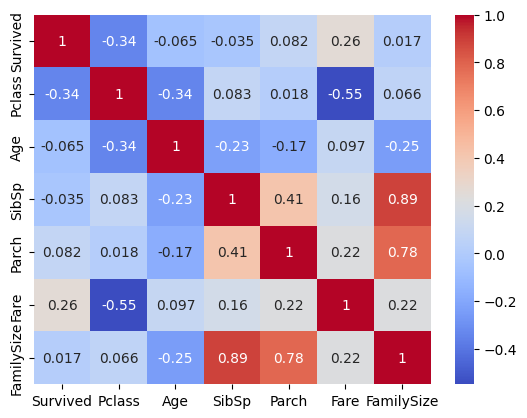

In [ ]:
sns.heatmap(train_corr,annot=True,cmap='coolwarm')
plt.show()

In [ ]:
train_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked', 'FamilySize'],
      dtype='object')

In [ ]:
train_df.drop(columns=['Name','Ticket','SibSp','Parch'],axis=1,inplace=True)

In [ ]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1


In [ ]:
profile = ProfileReport(train_df, title="My_Data_Report", explorative=True)
profile.to_file("post_processing.html")
print("Accomplished")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 7/7 [00:00<00:00, 24.29it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished


In [ ]:
#from google.colab import files
#files.download('post_processing.html')

In [ ]:
train_df.dtypes

,0
Survived,int64
Pclass,int64
Sex,object
Age,float64
Fare,float64
Embarked,object
FamilySize,int64


In [ ]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1


In [ ]:
train_df['Pclass'] = train_df['Pclass'].astype(dtype=object)

In [ ]:
train_df.dtypes

,0
Survived,int64
Pclass,object
Sex,object
Age,float64
Fare,float64
Embarked,object
FamilySize,int64


In [ ]:
encoded_data = pd.get_dummies(train_df)
encoded_data.head()

,Survived,Age,Fare,FamilySize,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,2,False,False,True,False,True,False,False,True
1,1,38.0,71.2833,2,True,False,False,True,False,True,False,False
2,1,26.0,7.9250,1,False,False,True,True,False,False,False,True
3,1,35.0,53.1000,2,True,False,False,True,False,False,False,True
4,0,35.0,8.0500,1,False,False,True,False,True,False,False,True


In [ ]:
encoded_data.columns

Index(['Survived', 'Age', 'Fare', 'FamilySize', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [ ]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Age         891 non-null    float64
 2   Fare        891 non-null    float64
 3   FamilySize  891 non-null    int64  
 4   Pclass_1    891 non-null    bool   
 5   Pclass_2    891 non-null    bool   
 6   Pclass_3    891 non-null    bool   
 7   Sex_female  891 non-null    bool   
 8   Sex_male    891 non-null    bool   
 9   Embarked_C  891 non-null    bool   
 10  Embarked_Q  891 non-null    bool   
 11  Embarked_S  891 non-null    bool   
dtypes: bool(8), float64(2), int64(2)
memory usage: 34.9 KB


In [ ]:
encoded_data['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [ ]:
x=encoded_data.drop(columns=['Survived'],axis=1)
y=encoded_data['Survived']

In [ ]:
x.head()

,Age,Fare,FamilySize,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,7.2500,2,False,False,True,False,True,False,False,True
1,38.0,71.2833,2,True,False,False,True,False,True,False,False
2,26.0,7.9250,1,False,False,True,True,False,False,False,True
3,35.0,53.1000,2,True,False,False,True,False,False,False,True
4,35.0,8.0500,1,False,False,True,False,True,False,False,True


In [ ]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42,stratify=y)

In [ ]:
print(f"Training data shape ::: {x_train.shape},{y_train.shape}")
print(f"Testing data shape ::: {x_test.shape},{y_test.shape}")

Training data shape ::: (801, 11),(801,)
Testing data shape ::: (90, 11),(90,)


In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred_train = logreg.predict(x_train)
y_pred_test = logreg.predict(x_test)

In [ ]:
logreg.coef_

array([[-0.04048699,  0.00340664, -0.19361482,  1.18181449,  0.34593949,
        -0.8279249 ,  1.67841443, -0.97858536,  0.37285044,  0.33684637,
        -0.00986773]])

In [ ]:
logreg.intercept_

array([0.86132499])

In [ ]:
logreg.classes_

array([0, 1])

In [ ]:
logreg.n_iter_

array([100], dtype=int32)

In [ ]:
y_pred_train

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [ ]:
y_pred_test

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0])

In [ ]:
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
confusion_matrix.index = ['Actual Died','Actual Survived']
confusion_matrix.columns = ['Predicted Died','Predicted Survived']
print(confusion_matrix)

                 Predicted Died  Predicted Survived
Actual Died                  45                  10
Actual Survived              11                  24
